Значення після тренування:
[0.3 0.6]


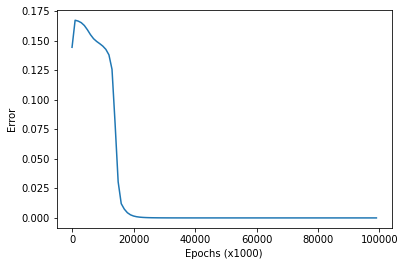

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

input_vectors = np.array([[0.2, 0.5, 0.3], 
                          [0.1, -0.2, 0.25], 
                          [0.15, 0.5, 0.2]])
output_vectors = np.array([[0.1, 0.2], 
                           [0.1, 0.4], 
                           [0.3, 0.6]])

np.random.seed(42)
#Задаємо ваги
weights1 = np.random.uniform(-0.5, 0.5, (3, 4))
weights2 = np.random.uniform(-0.5, 0.5, (4, 3))
weights3 = np.random.uniform(-0.5, 0.5, (3, 2))

learning_rate = 0.5
epochs = 100000
errors = []

for epoch in range(epochs):
    for i in range(len(input_vectors)):
        #Прямий прохід
        layer1 = sigmoid(np.dot(input_vectors[i], weights1))
        layer2 = sigmoid(np.dot(layer1, weights2))
        layer3 = sigmoid(np.dot(layer2, weights3))

        #Зворотній прохід
        layer3_error = output_vectors[i] - layer3
        layer3_delta = layer3_error * sigmoid_derivative(layer3)

        layer2_error = np.dot(layer3_delta, weights3.T)
        layer2_delta = layer2_error * sigmoid_derivative(layer2)

        layer1_error = np.dot(layer2_delta, weights2.T)
        layer1_delta = layer1_error * sigmoid_derivative(layer1)

        #Оновлення вагів
        weights3 += learning_rate * np.outer(layer2, layer3_delta)
        weights2 += learning_rate * np.outer(layer1, layer2_delta)
        weights1 += learning_rate * np.outer(input_vectors[i], layer1_delta)

    if epoch % 1000 == 0:
        errors.append(np.mean(np.abs(layer3_error)))
print("Значення після тренування:") 
print(layer3)
plt.plot(range(0, epochs, 1000), errors)
plt.xlabel("Epochs (x1000)")
plt.ylabel("Error")
plt.show()